In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import make_blobs
import random 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
X, y = make_blobs(n_samples = 150, random_state = 42)

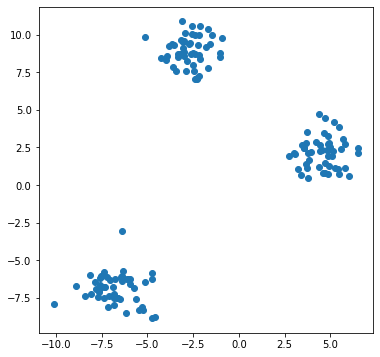

In [3]:
plt.figure(figsize = (6,6))
plt.scatter(X[:,0],X[:,1])

In [4]:
def kmeans(data, k, max_iterations, min_distance):    
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        old_centroids = centroids.copy()
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0) 
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False      
        if optimal:
            break
    return old_centroids, classes

In [5]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [6]:
def inclus_dis(centroids, classes):
    summ = 0.0
    for k, elems in classes.items():
        nk = 0
        dk = 0.0
        for elem in elems:
            nk +=1
            dk += (e_metrics(elem, centroids[k]))**2
        summ +=dk/nk
    return summ

In [7]:
max_iterations = 3
min_distance = 1e-4
ka = [1,2,3,4,5,6,7,8,9,10]
icd=[]
for k in ka:
    centroids, clusters = kmeans(X,k,max_iterations,min_distance)
    intercl_dist = inclus_dis(centroids,clusters)
    icd.append(round(intercl_dist,2))
    print(icd[k-1])

65.75
58.34
5.67
6.02
7.07
7.54
7.8
7.85
7.49
7.54


<function matplotlib.pyplot.show(close=None, block=None)>

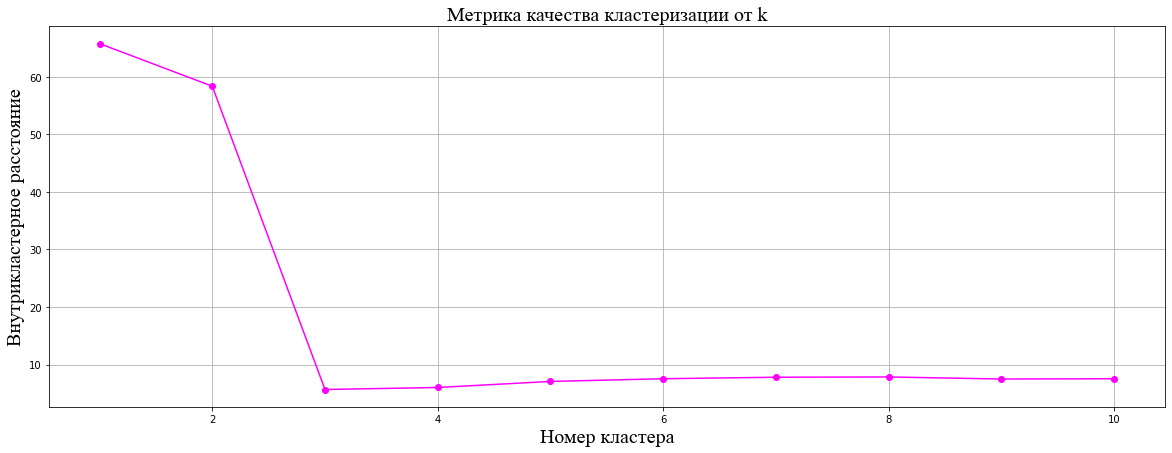

In [8]:
plt.figure(figsize = (20,7))
plt.plot(np.array(ka),np.array(icd), color='magenta', marker = 'o')
plt.title('Метрика качества кластеризации от k', fontsize=20, fontname='Times New Roman')
plt.xlabel('Номер кластера', fontsize=20, fontname='Times New Roman')
plt.ylabel('Внутрикластерное расстояние', fontsize=20, fontname='Times New Roman')
plt.grid(True)
plt.show

### Точка перегиба выпадает на третий кластер.